Name : Janhavy Bhalerao<br>
ROll No : 14 <br>
DL Assignment No.02





In [1]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import argparse as ap

In [ ]:
print("[INFO] accessing MNIST...")

[INFO] accessing MNIST...


In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 6s 12ms/step - loss: 2.2731 - accuracy: 0.1850 - val_loss: 2.2380 - val_accuracy: 0.1485
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 2.2046 - accuracy: 0.3853 - val_loss: 2.1622 - val_accuracy: 0.5609
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 2.1174 - accuracy: 0.5556 - val_loss: 2.0567 - val_accuracy: 0.6119
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.9922 - accuracy: 0.6335 - val_loss: 1.9046 - val_accuracy: 0.6522
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.8154 - accuracy: 0.6838 - val_loss: 1.6986 - val_accuracy: 0.6912
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 1.5958 - accuracy: 0.7186 - val_loss: 1.4657 - val_accuracy: 0.7431
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.3709 - accuracy: 0.7486 - val_loss: 1

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



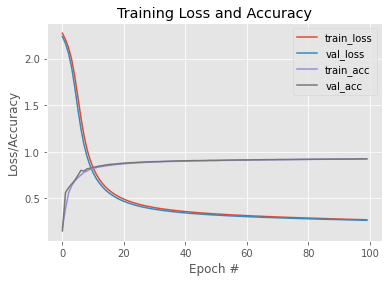

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()